<a href="https://colab.research.google.com/github/hariharihi/Data-Science-for-Everybody/blob/main/Day06/6_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0%EB%A5%BC_%ED%86%B5%ED%95%9C_%EC%9E%90%EB%8F%99%EC%B0%A8_%EC%97%B0%EB%B9%84_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%98%88%EC%B8%A1_input.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 텐서플로를 통한 자동차 연비 예측하기
* 참고 : [자동차 연비 예측하기: 회귀  |  TensorFlow Core](https://www.tensorflow.org/tutorials/keras/regression)

## 필요 도구 가져오기

In [ ]:
# 데이터 분석을 위한 pandas, 시각화를 위한 seaborn 불러오기

import pandas as pd
import seaborn as sns

## 데이터셋 로드

In [ ]:
# 자동차연비 데이터셋인 mpg 데이터셋을 불러옵니다.

df = sns.load_dataset("mpg")
df.shape

(398, 9)

## 결측치 확인

In [ ]:
# 결측치의 합계 구하기
  # 머신러닝/딥러닝 모델로 예측하기
      # 결측치가 있으면 그 데이터는 계산할 수 없음
      # 따라서 다른 값으로 i. 대체하거나 ii. 제거해야 한다 

df.isnull()
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

## 결측치 제거

In [ ]:
# dropna로 결측치를 제거합니다.

df.dropna()

#제거된 결측치 반영하기
df = df.dropna()
df.shape

(392, 9)

## 수치 데이터만 가져오기
* 머신러닝이나 딥러닝 모델은 내부에서 수치계산을 하기 때문에 숫자가 아닌 데이터를 넣어주면 모델이 학습과 예측을 할 수 없습니다.

In [ ]:
# select_dtypes 를 통해 object 타입을 제외하고 가져옵니다.
  # 수치형 데이터만 사용할 수 있다

df.select_dtypes(exclude="object")

#제거한 object 반영하기
df = df.select_dtypes(exclude="object")
df.shape

(392, 7)

## 전체 데이터에 대한 기술 통계 확인

In [ ]:
# describe 를 통해 기술 통계값을 확인합니다.
  # 수치형 데이터에 대한 기술통계

df.describe(include="all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


## 데이터셋 나누기

In [ ]:
# 전체 데이터프레임에서 df, train, test를 분리합니다.
  # train_dataset : 학습에 사용 (예: 기출문제)
  # test_dataset : 실제 예측에 사용 (예 : 실전문제)
# 기출문제로 공부하고 실전 시험을 보는 과정과 유사합니다.

# frac: 80%는 training에, 20%는 testng에 사용
train_dataset = df.sample(frac=0.8, random_state=0)
train_dataset.shape

(314, 7)

In [ ]:
# train과 test dataset 겹치지 않게 하기
test_dataset = df. drop(train_dataset.index)
test_dataset

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
9,15.0,8,390.0,190.0,3850,8.5,70
25,10.0,8,360.0,215.0,4615,14.0,70
28,9.0,8,304.0,193.0,4732,18.5,70
31,25.0,4,113.0,95.0,2228,14.0,71
33,19.0,6,232.0,100.0,2634,13.0,71
...,...,...,...,...,...,...,...
369,34.0,4,112.0,88.0,2395,18.0,82
375,36.0,4,105.0,74.0,1980,15.3,82
382,34.0,4,108.0,70.0,2245,16.9,82
384,32.0,4,91.0,67.0,1965,15.7,82


In [ ]:
# train_dataset, test_dataset 에서 label(정답) 값을 꺼내 label 을 따로 생성합니다.
# 문제에서 정답을 분리하는 과정입니다.
  # .pop(): 시리즈 형태로 반환
    # train_labels : train_dataset(예: 기출문제) 에서 정답을 꺼내서 분리합니다.
    # test_labels : test_labels(예: 실전문제) 에서 정답을 꺼내서 분리합니다.

train_labels = train_dataset.pop("mpg")
train_labels.shape

(314,)

In [ ]:
test_labels = test_dataset.pop("mpg")
test_labels.shape

(78,)

In [ ]:
# 열이 하나씩 줄어들었다 (mpg)
train_dataset.shape, test_dataset.shape

((314, 6), (78, 6))

In [ ]:
train_dataset.head()

,cylinders,displacement,horsepower,weight,acceleration,model_year
146,4,90.0,75.0,2125,14.5,74
282,4,140.0,88.0,2890,17.3,79
69,8,350.0,160.0,4456,13.5,72
378,4,105.0,63.0,2125,14.7,82
331,4,97.0,67.0,2145,18.0,80


In [ ]:
train_labels.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: mpg, dtype: float64

## 딥러닝 모델 만들기
<img src="https://cs231n.github.io/assets/nn1/neural_net.jpeg" width="30%"> <img src="https://cs231n.github.io/assets/nn1/neural_net2.jpeg" width="40%">

* 이미지 출처 : https://cs231n.github.io/neural-networks-1/

* 두 개의 완전 연결(densely connected) 은닉층으로 Sequential 모델을 만들겠습니다. 
* 출력 층은 하나의 연속적인 값을 반환합니다. 

In [ ]:
# tensorflow 를 불러옵니다.

import tensorflow as tf
tf.__version__

'2.7.0'

### 딥러닝 층 구성

In [ ]:
model = tf.keras.Sequential()

# Unit의 개수는 임의로 지정
# activtation function 지정
# input_shape는 입력하는 변수의 개수를 지정
# 위는 입력층, 아래는 출력층
# 중간에 hidden layer 설정

model.add(tf.keras.layers.Dense(64, activation="relu", input_shape=[len(train_dataset.keys())]))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(1))

### 모델 컴파일

In [ ]:
# loss function: 회귀모델에서는 mse 많이 사용
# metrics: 성능 측정 지표
  # 회귀모델에서는 주로 다음과 같이 사용
    # mse(mean squared error, 실제 값과 예측 값의 차이를 제곱해 평균화)
    # mae(mean absolute error, 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화)
    # rmse (root-mse, 실제 오류 평균보다 더 커지는 특성의 mse에 루트를 씌운 값)
    
model.compile(loss="mse", metrics=["mae", "mse"])

### 만든 모델 확인하기

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                448       
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 1)                 65        
                                                                 
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


## 딥러닝 모델로 학습하기

In [ ]:
# fit()으로 학습하기
  # 만들어 둔 dataset과 labels 활용
  # epochs: 반복횟수
  # verbose: 로그

model.fit(train_dataset, train_labels, epochs=100, verbose=1)

Epoch 1/100
10/10 [==============================] - 1s 2ms/step - loss: 11670.3203 - mae: 46.8582 - mse: 11670.3203
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 1279.8860 - mae: 29.2557 - mse: 1279.8860
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 1313.7498 - mae: 31.7473 - mse: 1313.7498
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 2280.3486 - mae: 44.2822 - mse: 2280.3486
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 1151.7820 - mae: 29.0214 - mse: 1151.7820
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 1451.9885 - mae: 30.9427 - mse: 1451.9885
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 1700.4504 - mae: 37.4607 - mse: 1700.4504
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 1178.9900 - mae: 30.6526 - mse: 1178.9900
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 961.3

In [ ]:
# verbose=0일 경우, log가 출력되지 않음

model.fit(train_dataset, train_labels, epochs=10, verbose=0)

## 딥러닝 모델로 평가하기

In [ ]:
# evaluate()으로 평가하기
  # compile()에서 지정한 loss와 metrics 사용

model.evaluate(test_dataset, test_labels)

3/3 [==============================] - 0s 4ms/step - loss: 34.2685 - mae: 4.6153 - mse: 34.2685


[34.26848220825195, 4.615283489227295, 34.26848220825195]

## 딥러닝 모델의 예측하기

In [ ]:
# predict()로 예측하기
  # flatten()으로 1차원화시키기
  
predict_labels = model.predict(test_dataset).flatten()
predict_labels[:5]

array([18.001257, 21.426088, 23.802834, 28.04618 , 14.322048],
      dtype=float32)

## 딥러닝 모델의 예측결과 평가하기

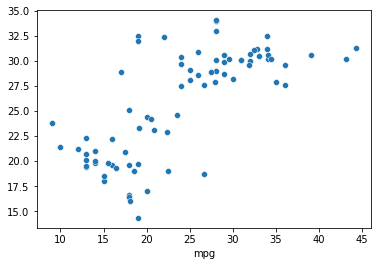

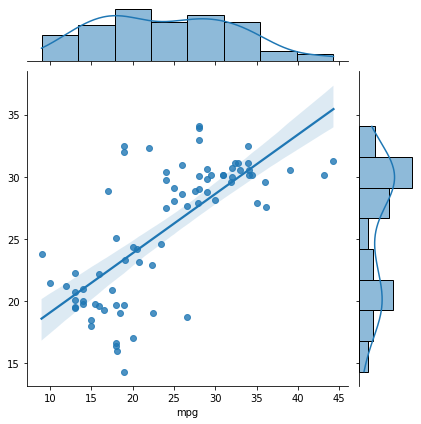

In [ ]:
sns.scatterplot(x=test_labels, y=predict_labels)
sns.jointplot(x=test_labels, y=predict_labels, kind="reg")

In [ ]:
# 개선하기
  # 학습순서(epochs) 늘리기!
  # unit 외에도 activation function 지정하기

# 개선할 수록 오차값이 줄어든다
  # 0에 가까울수록 정확도는 높아진다 = 성능이 좋아진다